## Pandas Samples ##

### Uber taxi Drivers ###

dataset about 10000 Uber rides from one day in New York city. 
The columns give information about time and location of each pickup


In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
uber_df = pd.read_csv('./data-files/pandas/uber-apr14.csv')
uber_df.columns

Index(['Id', 'Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [3]:
uber_df.sample(3)

,Id,Date/Time,Lat,Lon,Base
2731,2731,4/3/2014 12:02:00,40.7173,-74.0081,B02512
5164,5164,4/4/2014 19:18:00,40.7306,-73.9931,B02512
657,657,4/1/2014 17:12:00,40.6898,-73.9782,B02512


In [4]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         10000 non-null  int64  
 1   Date/Time  10000 non-null  object 
 2   Lat        10000 non-null  float64
 3   Lon        10000 non-null  float64
 4   Base       10000 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [5]:
# column 'Date/Time' is in object format, lets correct it
uber_df['Date/Time'] = uber_df['Date/Time'].apply(pd.to_datetime)
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         10000 non-null  int64         
 1   Date/Time  10000 non-null  datetime64[ns]
 2   Lat        10000 non-null  float64       
 3   Lon        10000 non-null  float64       
 4   Base       10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
# for some pattern, lets get DayOfWeek, Day & only Date for each data point

def dayOfWeek(x):
    return x.weekday()+1

def dayName(x):
    return x.day_name()

uber_df['DayOfWeek'] = uber_df['Date/Time'].apply(dayOfWeek)
uber_df['DayName'] = uber_df['Date/Time'].apply(dayName)
uber_df['DateOnly'] = uber_df['Date/Time'].apply(lambda x: x.date())
uber_df.head(3)

,Id,Date/Time,Lat,Lon,Base,DayOfWeek,DayName,DateOnly
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2,Tuesday,2014-04-01
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2,Tuesday,2014-04-01
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2,Tuesday,2014-04-01


In [7]:
# average no of rides/DayofWeek

uber_df_gr = uber_df.groupby(['DayOfWeek', 'DateOnly']) # to find average we need to know no of days contributing to a dayofweek
uber_df_gr.count()

Id  Date/Time   Lat   Lon  Base  DayName
DayOfWeek DateOnly                                              
1         2014-04-07  1376       1376  1376  1376  1376     1376
2         2014-04-01  1011       1011  1011  1011  1011     1011
          2014-04-08   839        839   839   839   839      839
3         2014-04-02  1336       1336  1336  1336  1336     1336
4         2014-04-03  1482       1482  1482  1482  1482     1482
5         2014-04-04  1827       1827  1827  1827  1827     1827
6         2014-04-05  1309       1309  1309  1309  1309     1309
7         2014-04-06   820        820   820   820   820      820

In [8]:
# notice for DayofWeek==2, we have multiple days contributing data
# now, we can groupby dayofweek and take mean 

uber_df_gr.count().groupby('DayOfWeek').mean()

,Id,Date/Time,Lat,Lon,Base,DayName
DayOfWeek,,,,,,
1,1376,1376,1376,1376,1376,1376
2,925,925,925,925,925,925
3,1336,1336,1336,1336,1336,1336
4,1482,1482,1482,1482,1482,1482
5,1827,1827,1827,1827,1827,1827
6,1309,1309,1309,1309,1309,1309
7,820,820,820,820,820,820


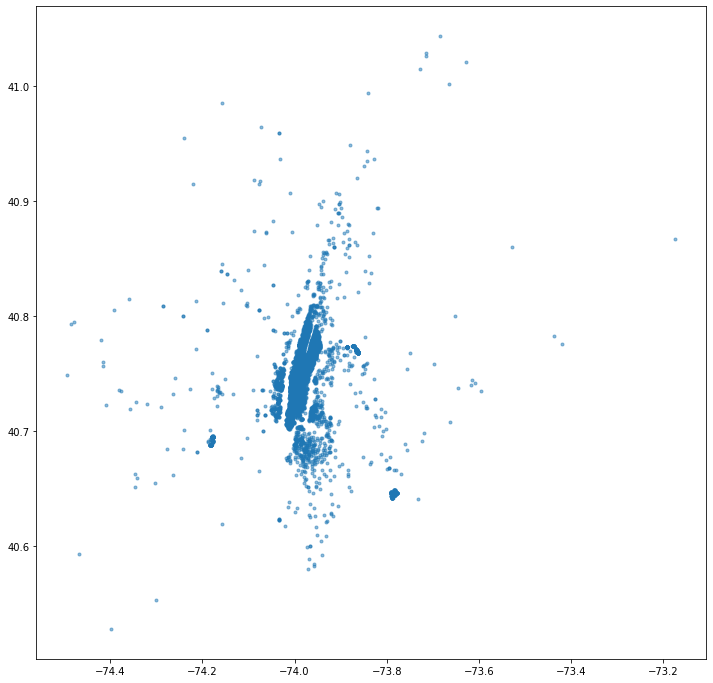

In [9]:
# Plotting a graph of Lat/Lon to see the spread of rides to highlevel access if rides are concentrated to a region
plt.figure(figsize=(12, 12))
plt.plot(uber_df['Lon'], uber_df['Lat'], '.',alpha=0.5)

(40.65, 40.85)

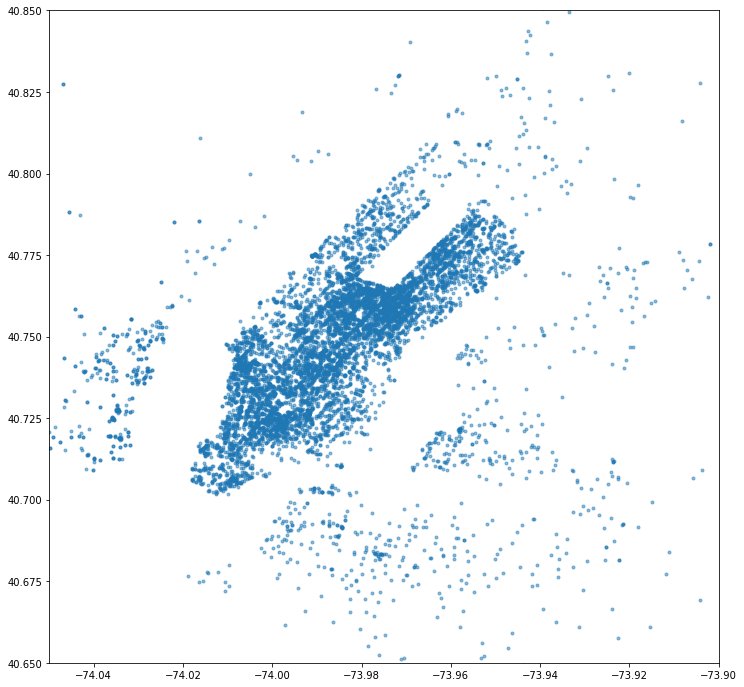

In [10]:
# we can see that most of the rides happen within the city
# lets zoom it up using the xlim & ylim
plt.figure(figsize=(12, 12))
plt.plot(uber_df['Lon'], uber_df['Lat'], '.',alpha=0.5)
plt.xlim(-74.05,-73.90)
plt.ylim(40.65, 40.85)